# STOCK MARKET CLUSTERING

* In this Project, we will be extracting live Stock Market Data from yahoo Finance. We will find similarities amongst various companies using their stock market prices and then cluster them into different clusters using the K-means algorithm

<br>
Note This is an unsupervised machine learning problem and will use an unsupervised machine learning technique with the help of K-Means algorithm.<br>
<br>
NB "pandas_datareader" extract data from various internet sources into a DataFrame. Currently the folliwing sources supported:

    * Yahoo! Finance
    * Google Finance
    * St.Louis FED (FRED)
    * Kenneth French's Data Library
    * World Bank
    * Google Analytics

In [1]:
!pip install  pandas_datareader

     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     -------------------------------------- 109.5/109.5 kB 6.2 MB/s eta 0:00:00


In [2]:
!pip install plotly

In [3]:
from pyforest import*

In [6]:
lazy_imports()

['import plotly.express as px',
 'from sklearn.model_selection import RandomizedSearchCV',
 'import pickle',
 'from pyspark import SparkContext',
 'import statsmodels.api as sm',
 'from sklearn import svm',
 'from sklearn.manifold import TSNE',
 'from sklearn.linear_model import Ridge',
 'from sklearn.preprocessing import LabelEncoder',
 'from openpyxl import load_workbook',
 'import sklearn',
 'from fbprophet import Prophet',
 'from sklearn.ensemble import RandomForestRegressor',
 'import sys',
 'import numpy as np',
 'from pathlib import Path',
 'import keras',
 'from sklearn import metrics',
 'import matplotlib as mpl',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import fbprophet',
 'from sklearn.preprocessing import PolynomialFeatures',
 'from sklearn.decomposition import PCA',
 'from sklearn.model_selection import cross_val_score',
 'from scipy import signal as sg',
 'import textblob',
 'import awswrangler as wr',
 'from sklearn.feature_extraction.text import

### Import the libraries needed

In [2]:
import pandas_datareader as web
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import datetime as dt

In [141]:
companies_dict = {
    'Amazon' : 'AMZN',
    'Apple' : 'AAPL',
    'Walgreen' : 'WBA',
    'Northrop Grumman' : 'NOC',
    'Boeing' : 'BA',
    'Lockheed Martin' : 'LMT',
    'McDonalds' : 'MCD',
    'Intel' : 'IBM',
    'Texas Instruments' : 'TXN',
    'MasterCard' : 'MA',
    'Microsoft' : 'MSFT',
    'General Electronics' : 'GE',
    'American Express' : 'AXP',
    'Pepsi' : 'PEP',
    'Coca Cola' : 'KO',
    'Johnson & Johnson' : 'JNJ',
    'Toyota' : 'TM',
    'Exxon' : 'XOM',
    'Chevron' : 'CVX',
    'Valero Energy' : 'VLO',
    'Ford' : 'F',
    'Bank of America' : 'BAC',
    'Tesla' : 'TSLA',
    'Alphabet' : 'GOOG'
}

In [9]:
!pip install yfinance

     ---------------------------------------- 0.0/60.3 kB ? eta -:--:--
     ---------------------------------------- 60.3/60.3 kB ? eta 0:00:00
     ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
     -------------------------------------- 112.2/112.2 kB 6.4 MB/s eta 0:00:00


In [11]:
!pip install yahoofinancials

     ---------------------------------------- 0.0/41.5 kB ? eta -:--:--
     ---------------------------------------- 41.5/41.5 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for yahoofinancials: filename=yahoofinancials-1.14-py3-none-any.whl size=28689 sha256=54378b7ef95a5cd77e64465c8b05f47a9edc77bcbd95885ccf4ab281fc3ca63c
  Stored in directory: c:\users\cjay\appdata\local\pip\cache\wheels\34\c2\fd\f7163d3afea1d2b12f78fb0aa1563df3191be62a4fbb840a6d
Successfully built yahoofinancials


In [27]:
import yfinance as yf
import datetime as dt
from yahoofinancials import YahooFinancials
start_date = '2015-04-25'
end_date = dt.datetime.today()
my_data = yf.download(list(companies_dict.values()), start=start_date, end=end_date)
my_data

[*********************100%***********************]  22 of 22 completed


Adj Close                                                 \
                  AAPL        AMZN         AXP          BA        BAC   
Date                                                                    
2015-04-27   29.881836   21.927999   68.654198  130.068741  13.313066   
2015-04-28   29.411030   21.465500   68.654198  129.813522  13.390067   
2015-04-29   28.978516   21.468500   68.361809  128.616699  13.672411   
2015-04-30   28.192329   21.089001   68.618767  126.143768  13.629632   
2015-05-01   29.048346   21.143499   68.822548  127.314217  13.783640   
...                ...         ...         ...         ...        ...   
2023-05-16  172.070007  113.400002  148.410004  200.869995  27.360001   
2023-05-17  172.690002  115.500000  152.089996  206.869995  28.570000   
2023-05-18  175.050003  118.150002  153.479996  207.240005  28.469999   
2023-05-19  175.160004  116.250000  152.949997  205.490005  28.110001   
2023-05-22  174.199997  115.010002  155.509995  205.910004  28.340000   

                                                                       ...  \
                   CVX          F          GE         IBM         JNJ  ...   
Date                                                                   ...   
2015-04-27   76.925095  10.522605  141.144989  113.190231   80.504158  ...   
2015-04-28   77.920860  10.628494  142.405243  115.305153   80.632240  ...   
2015-04-29   78.348595  10.701981  142.247696  115.623413   80.352104  ...   
2015-04-30   77.878777  10.555011  142.195190  113.561516   79.399612  ...   
2015-05-01   76.462280  10.561691  143.402939  115.139397   80.144020  ...   
...                ...        ...         ...         ...         ...  ...   
2023-05-16  152.021332  11.250000  101.129997  123.459999  158.146774  ...   
2023-05-17  154.200012  11.500000  103.470001  125.709999  157.799408  ...   
2023-05-18  154.009995  11.640000  104.010002  126.150002  157.293213  ...   
2023-05-19  155.229996  11.650000  104.260002  127.260002  157.720001  ...   
2023-05-22  152.440002  11.630000  104.550003  127.500000  156.869995  ...   

             Volume                                                        \
                 MA      MCD      MSFT      NOC      PEP      TM      TXN   
Date                                                                        
2015-04-27  4854300  7282700  59248200  1231500  5348500  273000  8397300   
2015-04-28  4786300  4357400  60730800  1132300  5065900  421900  6729300   
2015-04-29  9364700  5697200  47804600  1397300  4963600  282900  5276300   
2015-04-30  7470700  8300300  64725500  2465400  6714400  246800  6756900   
2015-05-01  4663100  6280300  38937300  1136500  4622300  247100  5726700   
...             ...      ...       ...      ...      ...     ...      ...   
2023-05-16  2762700  2859500  26730300   448800  5803100  165800  4272900   
2023-05-17  3260300  2802100  24315000   758300  4878800  164600  4910300   
2023-05-18  3729500  2410700  27276000   518500  3709400  188900  4916300   
2023-05-19  3368800  2371200  27529500   463500  3883000  178400  4790500   
2023-05-22  1808800  2514100  24080300   508700  5786500  194400  3334000   

                                         
                VLO       WBA       XOM  
Date                                     
2015-04-27  8056400   4110200  10534600  
2015-04-28  7905400   2366500   9633800  
2015-04-29  6002600   3224500  12534100  
2015-04-30  8067500   4750200  13947700  
2015-05-01  6905700   2282200  12257100  
...             ...       ...       ...  
2023-05-16  4951700   5054600  14795200  
2023-05-17  4231400   7651200  14064700  
2023-05-18  4692300   6540200  12005600  
2023-05-19  3702400   4856300  13357700  
2023-05-22  3819400  10231600  12876500  

[2033 rows x 132 columns]

In [173]:
import numpy as np
import pandas as pd

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)
from pandas_datareader import data as pdr
start_date = '2015-04-25'
end_date = dt.datetime.today()
df = pdr.get_data_yahoo(list(companies_dict.values()), start=start_date, end=end_date)
df

[*********************100%***********************]  24 of 24 completed


Adj Close                                                 \
                  AAPL        AMZN         AXP          BA        BAC   
Date                                                                    
2015-04-27   29.881840   21.927999   68.654213  130.068756  13.313061   
2015-04-28   29.411030   21.465500   68.654213  129.813583  13.390065   
2015-04-29   28.978518   21.468500   68.361816  128.616714  13.672410   
2015-04-30   28.192329   21.089001   68.618744  126.143799  13.629631   
2015-05-01   29.048346   21.143499   68.822525  127.314262  13.783640   
...                ...         ...         ...         ...        ...   
2023-05-16  172.070007  113.400002  148.410004  200.869995  27.360001   
2023-05-17  172.690002  115.500000  152.089996  206.869995  28.570000   
2023-05-18  175.050003  118.150002  153.479996  207.240005  28.469999   
2023-05-19  175.160004  116.250000  152.949997  205.490005  28.110001   
2023-05-22  174.199997  115.010002  155.509995  205.910004  28.340000   

                                                                       ...  \
                   CVX          F          GE        GOOG         IBM  ...   
Date                                                                   ...   
2015-04-27   76.925110  10.522607  141.145004   27.768499  113.190262  ...   
2015-04-28   77.920853  10.628493  142.405228   27.684000  115.305161  ...   
2015-04-29   78.348618  10.701981  142.247681   27.454000  115.623398  ...   
2015-04-30   77.878777  10.555011  142.195190   26.867001  113.561516  ...   
2015-05-01   76.462265  10.561690  143.402893   26.895000  115.139389  ...   
...                ...        ...         ...         ...         ...  ...   
2023-05-16  152.021332  11.250000  101.129997  120.089996  123.459999  ...   
2023-05-17  154.200012  11.500000  103.470001  121.480003  125.709999  ...   
2023-05-18  154.009995  11.640000  104.010002  123.519997  126.150002  ...   
2023-05-19  155.229996  11.650000  104.260002  123.250000  127.260002  ...   
2023-05-22  152.440002  11.630000  104.550003  125.870003  127.500000  ...   

             Volume                                                          \
                MCD      MSFT      NOC      PEP      TM       TSLA      TXN   
Date                                                                          
2015-04-27  7282700  59248200  1231500  5348500  273000  175089000  8397300   
2015-04-28  4357400  60730800  1132300  5065900  421900   91281000  6729300   
2015-04-29  5697200  47804600  1397300  4963600  282900   59041500  5276300   
2015-04-30  8300300  64725500  2465400  6714400  246800   58678500  6756900   
2015-05-01  6280300  38937300  1136500  4622300  247100   79225500  5726700   
...             ...       ...      ...      ...     ...        ...      ...   
2023-05-16  2859500  26730300   448800  5803100  165800   98288800  4272900   
2023-05-17  2802100  24315000   758300  4878800  164600  125473600  4910300   
2023-05-18  2410700  27276000   518500  3709400  188900  109520300  4916300   
2023-05-19  2371200  27529500   463500  3883000  178400  136024200  4790500   
2023-05-22  2514100  24080300   508700  5786500  194400  131567900  3334000   

                                         
                VLO       WBA       XOM  
Date                                     
2015-04-27  8056400   4110200  10534600  
2015-04-28  7905400   2366500   9633800  
2015-04-29  6002600   3224500  12534100  
2015-04-30  8067500   4750200  13947700  
2015-05-01  6905700   2282200  12257100  
...             ...       ...       ...  
2023-05-16  4951700   5054600  14795200  
2023-05-17  4231400   7651200  14064700  
2023-05-18  4692300   6540200  12005600  
2023-05-19  3702400   4856300  13357700  
2023-05-22  3819400  10231600  12876500  

[2033 rows x 144 columns]

In [143]:
df.isnull().sum()

Adj Close  AAPL    0
           AMZN    0
           AXP     0
           BA      0
           BAC     0
                  ..
Volume     TSLA    0
           TXN     0
           VLO     0
           WBA     0
           XOM     0
Length: 144, dtype: int64

In [174]:
# stock_open is numpy array of transpose of df['Open']
stock_open = np.array(df['Open']).T
# stock_cllose is numpy array of transpose of df['Open']
stock_close = np.array(df['Close']).T

#### ‘movement’ is the difference of opening and closing prices of a particular day. Positive movement suggests to go long on stock(buy) and negative movement suggests to short the stock(sell).

In [175]:
movements = stock_close - stock_open

movements

array([[ 0.08499908, -0.97500229, -0.38000107, ...,  2.05000305,
        -1.22999573,  0.22000122],
       [-0.2650013 , -0.46000099,  0.13100052, ...,  1.45999908,
        -1.91000366, -1.75999451],
       [-0.34000397, -0.20000458,  0.03000641, ...,  1.22999573,
        -1.62001038,  1.83999634],
       ...,
       [-0.90999985, -1.11999893, -0.87000275, ...,  0.08000183,
        -1.31000519,  2.06999969],
       [-0.56999969,  0.24000549, -0.76999664, ..., -0.05000114,
        -0.21999931,  0.        ],
       [-0.40000153,  0.58000183,  0.37000275, ...,  1.21999359,
        -0.30999756, -0.86999512]])

In [176]:
# sum of differences of closing and opening proces of all days
sum_of_movement = np.sum(movements,1)
sum_of_movement

array([ 138.5596981 ,  -85.13672829,  -42.06999969, -148.32041168,
        -13.20002842,   -0.47987366,  -15.66001225,  -30.78868866,
         92.15663338,   -9.51979065,   19.41979218,   -0.20006561,
         11.08030701,   75.75074005,   66.48025513,  118.38983536,
        113.47032166,   35.80012512, -113.51998901,  -99.67868137,
         71.48993683,  -24.02992249,  -64.70999336,   25.11978149])

In [177]:
for i in range(len(companies_dict)):
    print(f"Company: {df['High'].columns[i]}, Change: {sum_of_movement[i]}")

Company: AAPL, Change: 138.5596981048584
Company: AMZN, Change: -85.13672828674316
Company: AXP, Change: -42.06999969482422
Company: BA, Change: -148.3204116821289
Company: BAC, Change: -13.200028419494629
Company: CVX, Change: -0.4798736572265625
Company: F, Change: -15.660012245178223
Company: GE, Change: -30.78868865966797
Company: GOOG, Change: 92.1566333770752
Company: IBM, Change: -9.519790649414062
Company: JNJ, Change: 19.41979217529297
Company: KO, Change: -0.20006561279296875
Company: LMT, Change: 11.080307006835938
Company: MA, Change: 75.75074005126953
Company: MCD, Change: 66.48025512695312
Company: MSFT, Change: 118.38983535766602
Company: NOC, Change: 113.47032165527344
Company: PEP, Change: 35.80012512207031
Company: TM, Change: -113.51998901367188
Company: TSLA, Change: -99.67868137359619
Company: TXN, Change: 71.48993682861328
Company: VLO, Change: -24.029922485351562
Company: WBA, Change: -64.70999336242676
Company: XOM, Change: 25.119781494140625


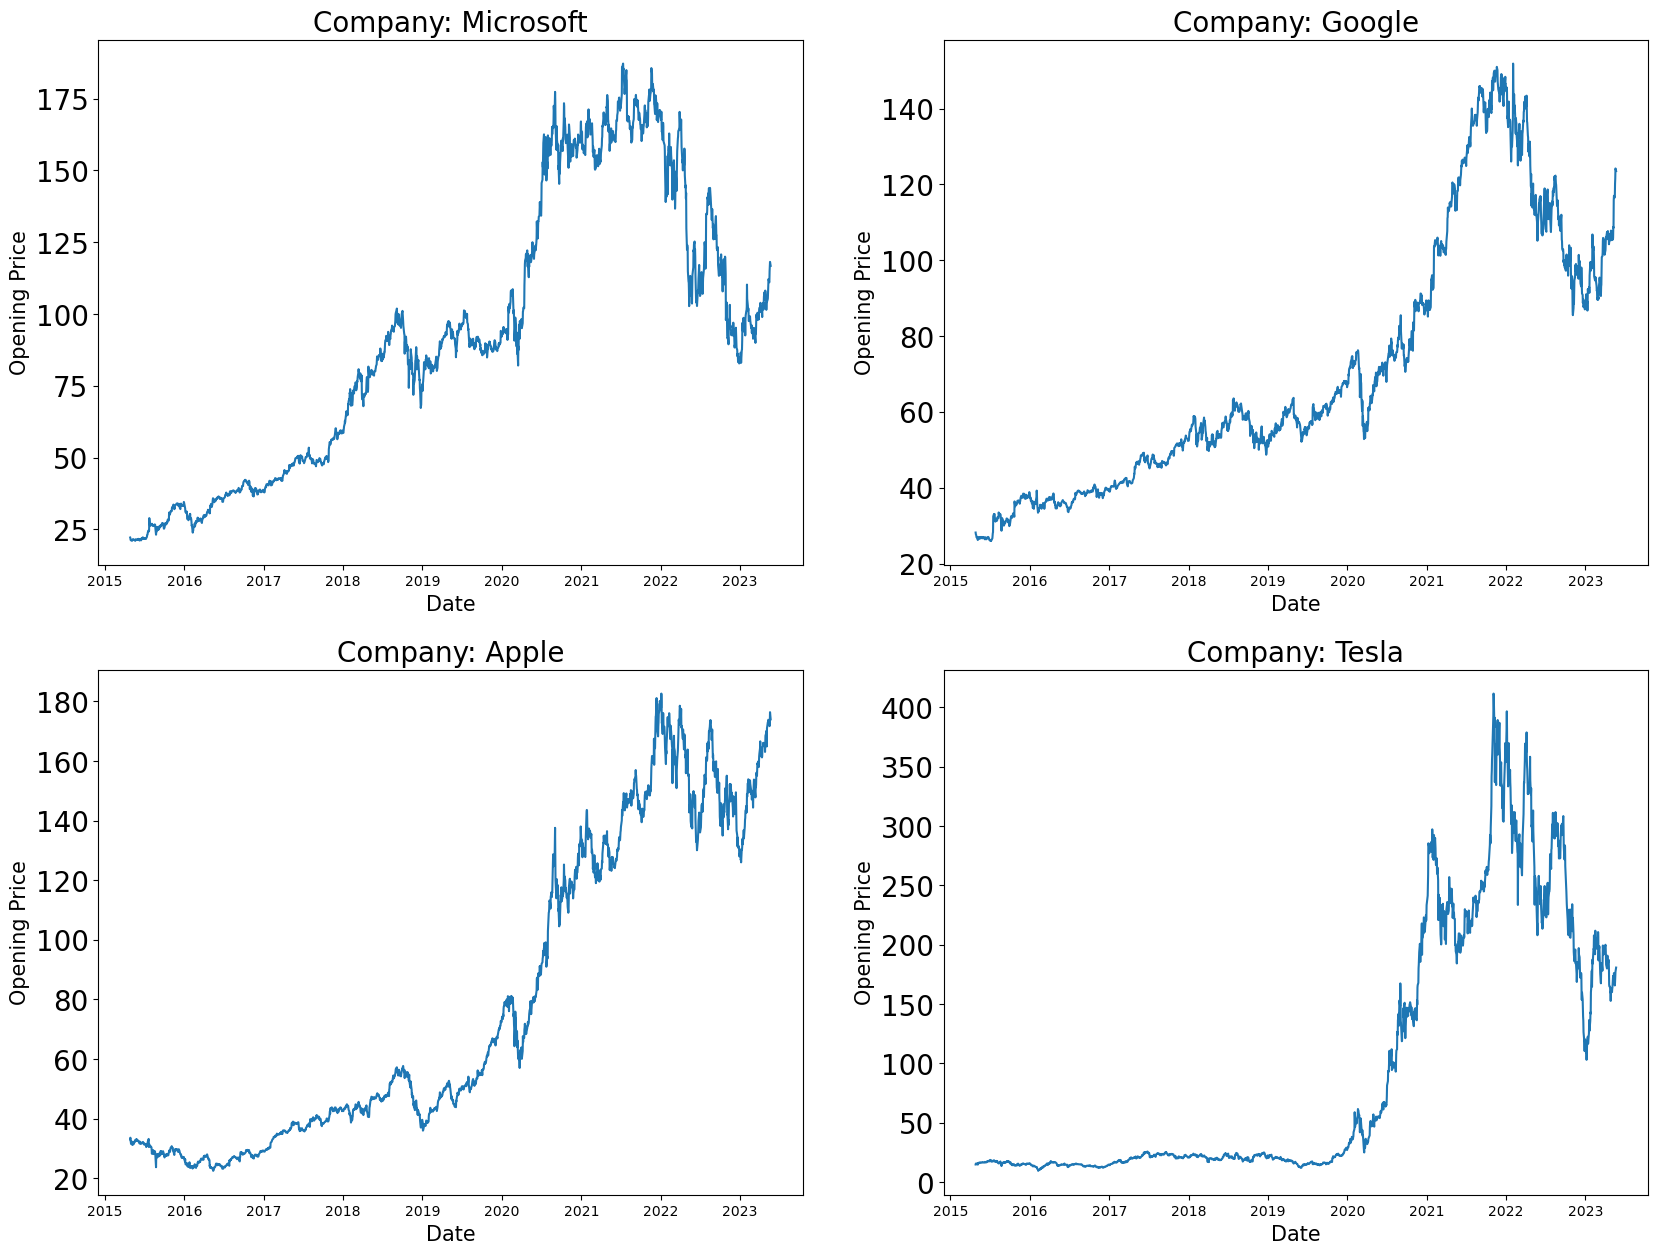

In [162]:
plt.figure(figsize = (20,15))
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2,2,1)

plt.title('Company: Microsoft', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Opening Price', fontsize = 15)
plt.plot(df['Open']['AMZN'])

plt.subplot(2,2,2)

plt.title('Company: Google', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Opening Price', fontsize = 15)
plt.plot(df['Open']['GOOG'])

plt.subplot(2,2,3)

plt.title('Company: Apple', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Opening Price', fontsize = 15)
plt.plot(df['Open']['AAPL'])

plt.subplot(2,2,4)

plt.title('Company: Tesla', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Opening Price', fontsize = 15)
plt.plot(df['Open']['TSLA'])




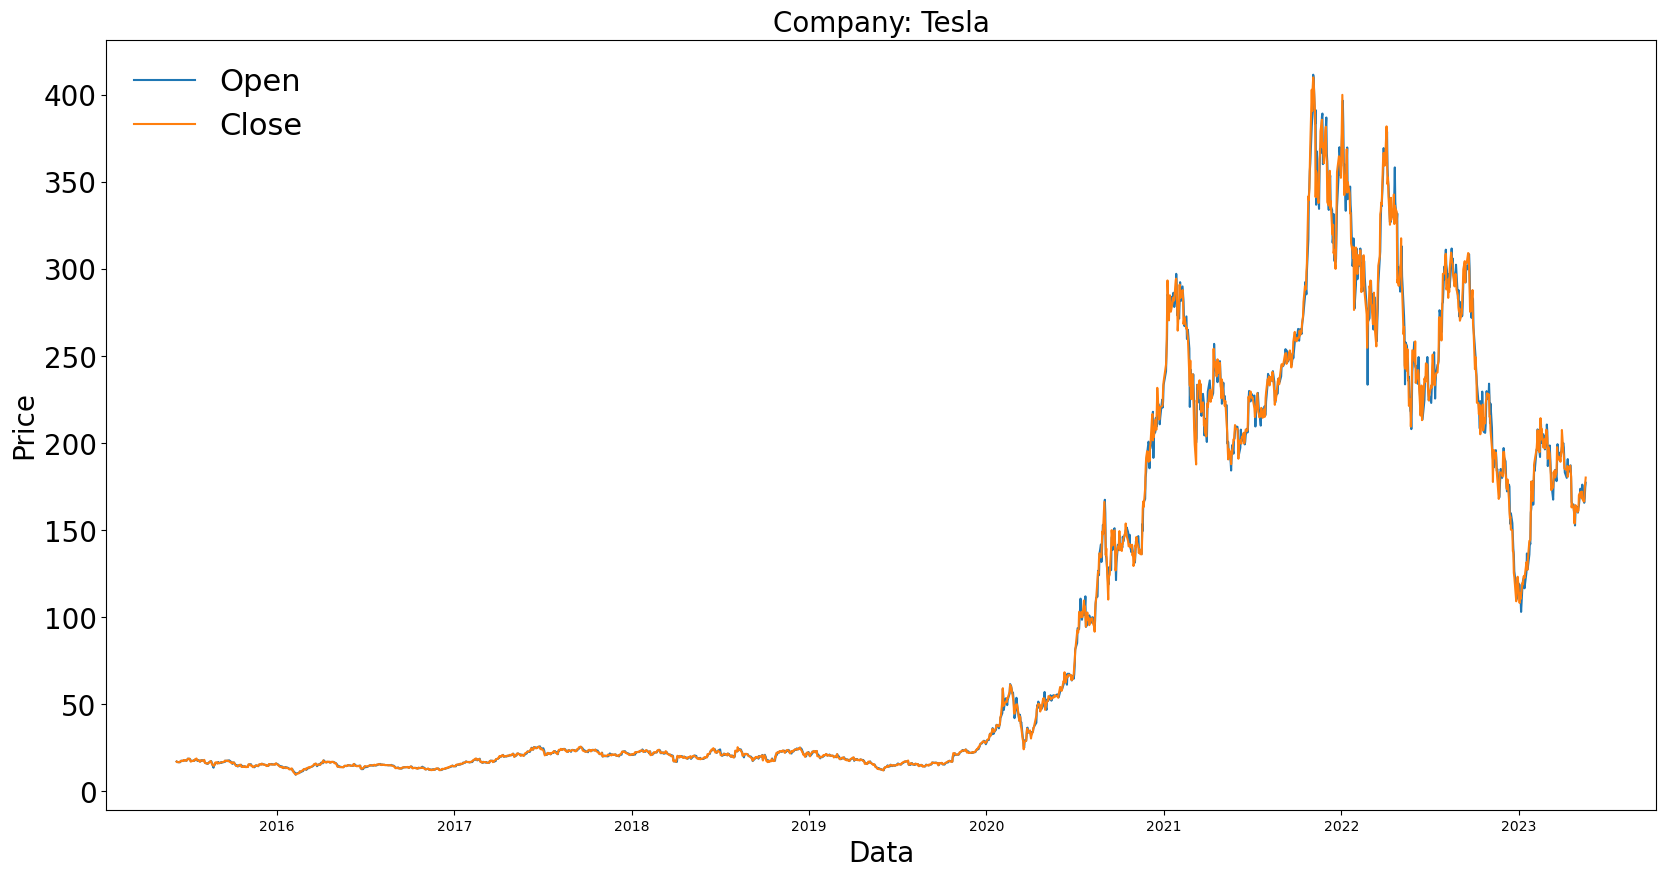

In [178]:
plt.figure(figsize = (20,10))

plt.title('Company: Tesla', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Data', fontsize = 20)
plt.ylabel('Price', fontsize = 20)
# Opening prices of first 30 days are plotted against data
plt.plot(df.iloc[30:-1]['Open']['TSLA'], label = 'Open')
# Closing prices of first 30 days are plotted against data
plt.plot(df.iloc[30:-1]['Close']['TSLA'], label = 'Close')
plt.legend(loc = 'upper left', frameon = False, framealpha=1, prop={'size': 22}) # Properties of legend box

**There is an overall increase in 'Open' and 'Close' prices over the 30-day time period which shows the company in a positive direction**

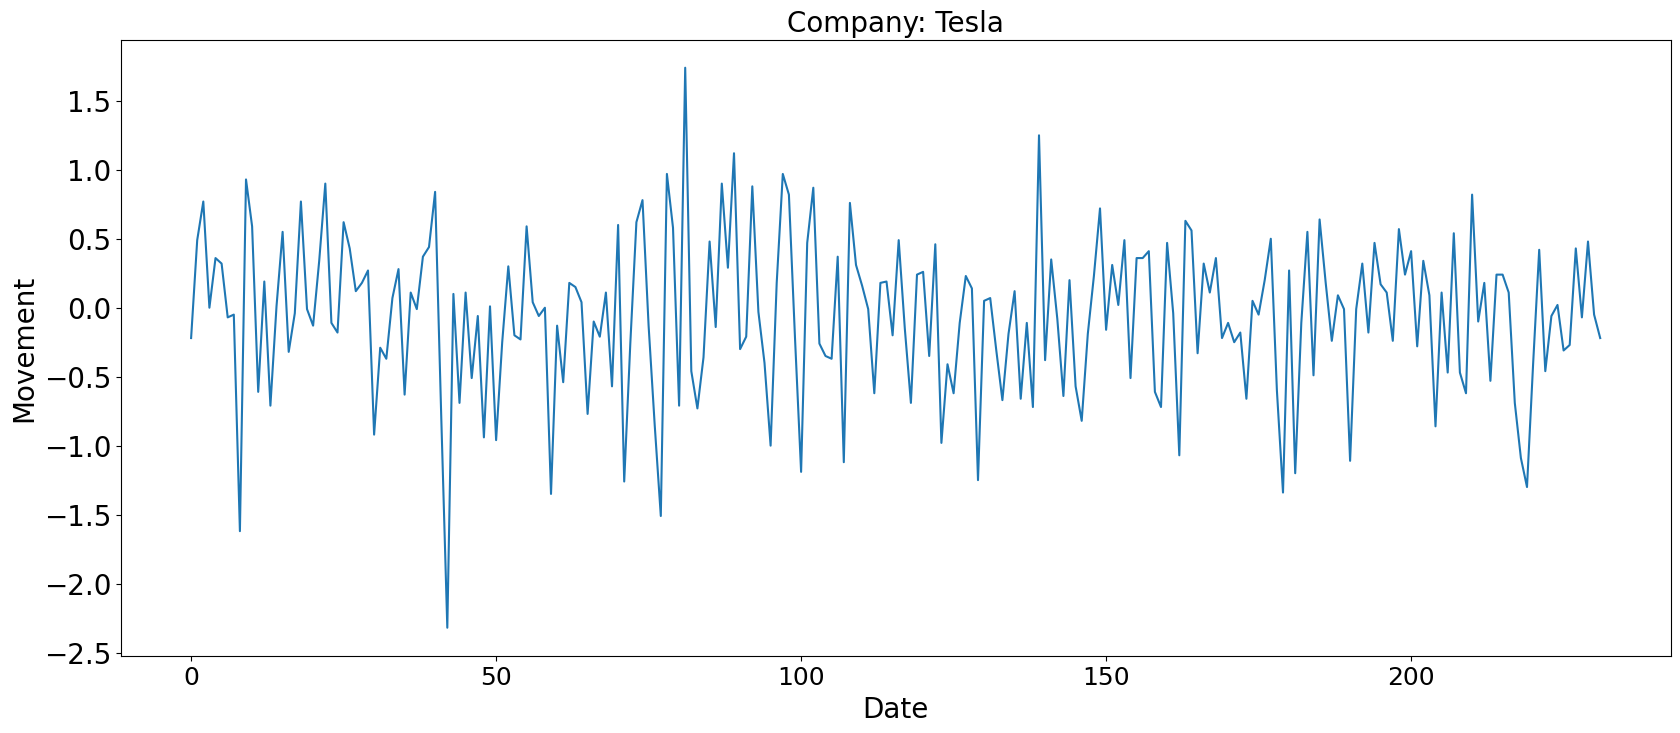

In [194]:
# 'Movement' is defference of closing and opening prices of a particular day

plt.figure(figsize = (20,8))
plt.title('Company: Tesla', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Movement', fontsize = 20)
plt.plot(movements[22][1800:-1])

**A positive movement is describe which suggests the price has increased during the day**

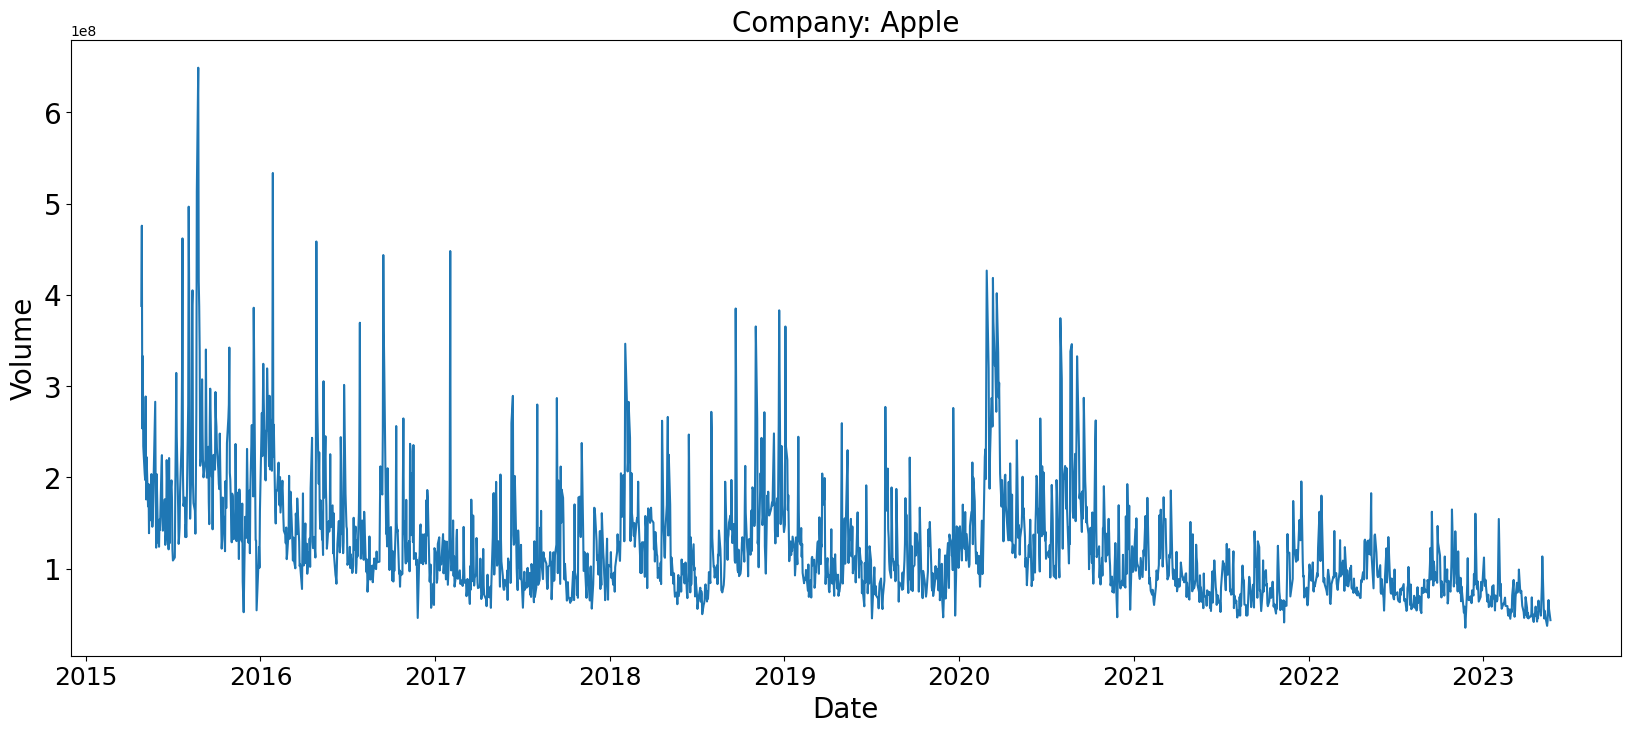

In [196]:
# The 'Volume' of stocks traded is plotted below

plt.figure(figsize = (20,8))
plt.title('Company: Apple', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Volume', fontsize = 20)
plt.plot(df['Volume']['AAPL'], label='Open')

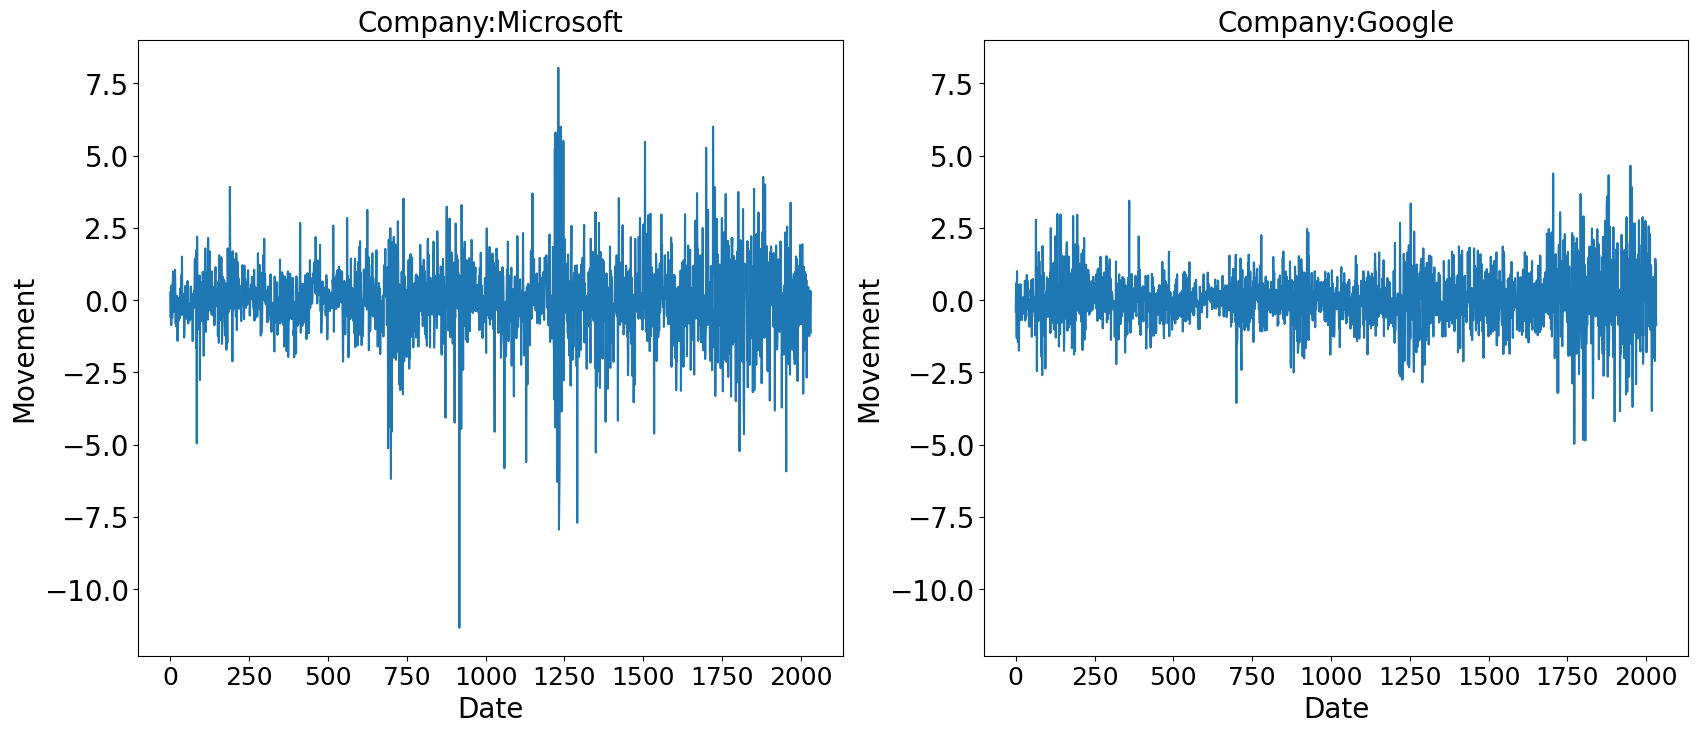

In [206]:
plt.figure(figsize = (20,8)) 

ax1 = plt.subplot(1,2,1)
plt.title('Company:Microsoft',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[10]) 

plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Google',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[23])

**The peaks suggest there are high volumes of stocks traded on certain days. This may be due to several situations which may affect the image of the company positively or negatively**

### Normalization

Stock prices of Microsoft and Google have different scales. There is a significant different in the rate of change of units in stock price of Microsoft and Google and in the case we need to normalise our data in order to have consistency in our data for frther analysis

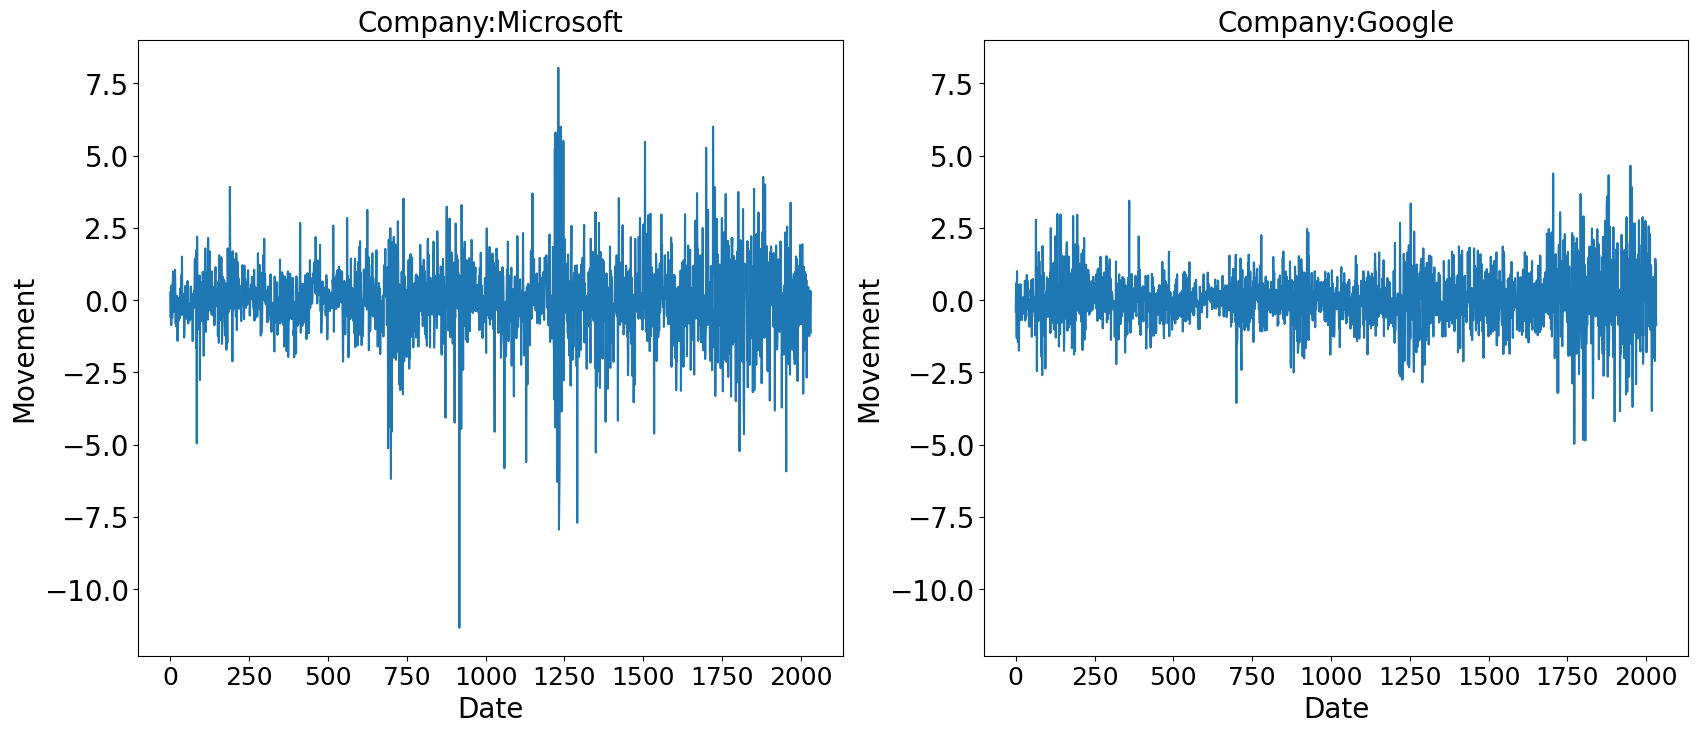

In [207]:
plt.figure(figsize = (20,8)) 

ax1 = plt.subplot(1,2,1)
plt.title('Company:Microsoft',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[10]) 

plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Google',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[23])

In [211]:
from sklearn.preprocessing import Normalizer
# Create the Normalizer
normalizer = Normalizer()
# Fit the Transform
norm_movements = normalizer.fit_transform(movements)

In [213]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.23665450403337615
0.18973477082582899
-2.5703335731971427e-05


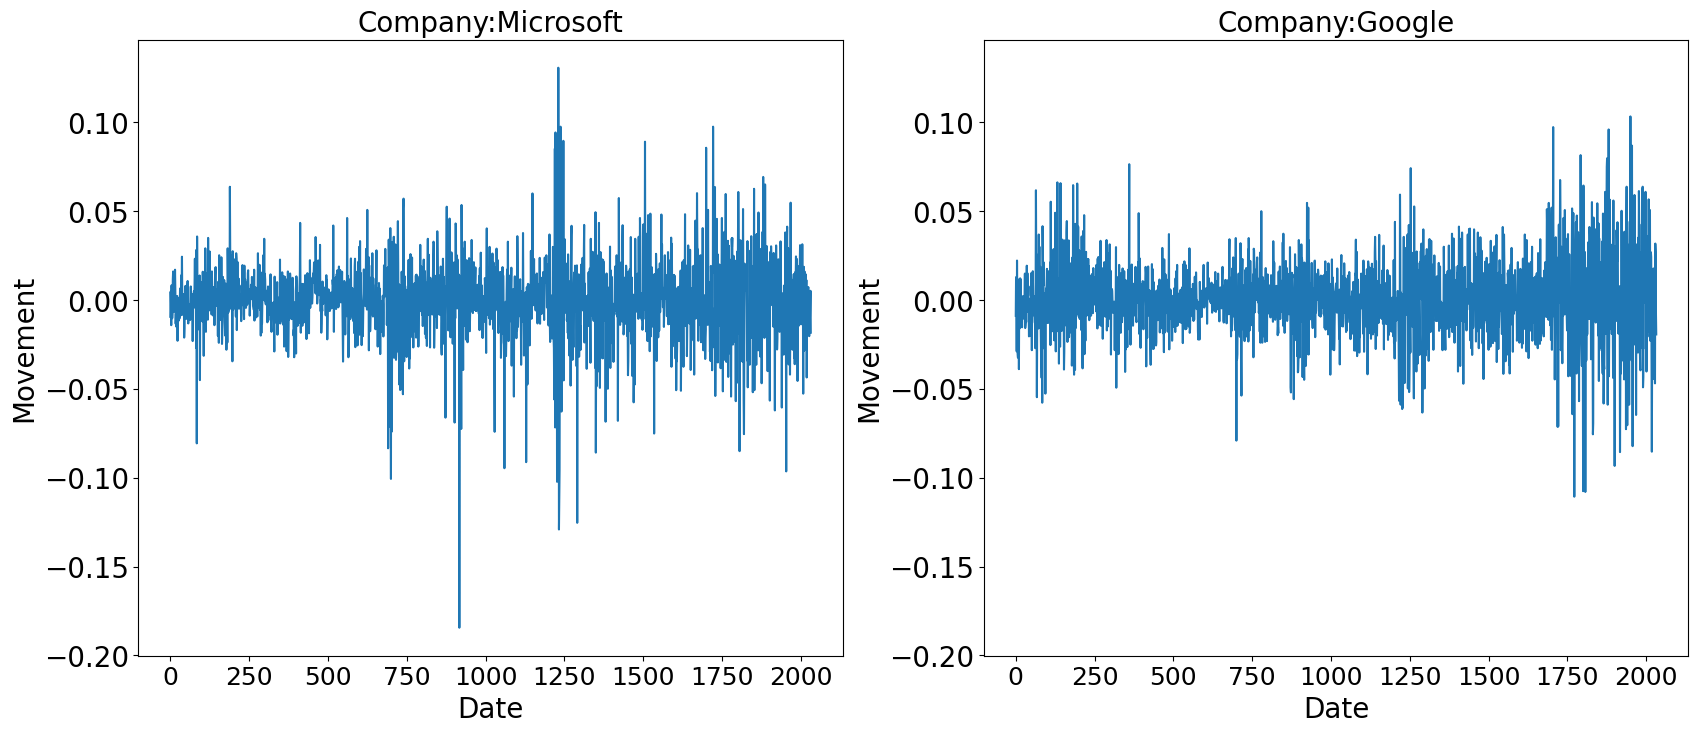

In [214]:
plt.figure(figsize = (20,8)) 

ax1 = plt.subplot(1,2,1)
plt.title('Company:Microsoft',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(norm_movements[10]) 

plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Google',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(norm_movements[23])

**Now we have similar Normalized of Microsoft and Google**

# Creating A Pipeline

In [216]:
# Import  the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

# Initialize a normalizer
normalizer = Normalizer()

# Create KMeans model
model_k = KMeans(n_clusters = 5, max_iter = 1000,n_init='auto' ,random_state = 42)

# Make a pipeline combining our normalizer and kmeans model
pipeline = make_pipeline(normalizer, model_k)

# Fit the pipeline to daily stock movements created earlier
pipeline.fit(movements)
predictions = pipeline.predict(movements)

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [217]:
predictions

array([3, 3, 1, 1, 1, 1, 0, 0, 3, 1, 2, 2, 4, 3, 2, 3, 4, 2, 1, 3, 3, 1,
       1, 1])

In [234]:
df1 = pd.DataFrame({'Cluster':predictions, 'Companies':list(companies_dict)}).sort_values(by='Cluster')

In [235]:
df1

,Cluster,Companies
11,0,General Electronics
17,0,Exxon
16,0,Toyota
10,0,Microsoft
12,0,American Express
2,1,Walgreen
3,1,Northrop Grumman
4,1,Boeing
6,1,McDonalds
18,1,Chevron


In [225]:
df1[df1['Cluster']==1]

,Cluster,Companies
2,1,Walgreen
3,1,Northrop Grumman
4,1,Boeing
5,1,Lockheed Martin
9,1,MasterCard
18,1,Chevron
21,1,Bank of America
22,1,Tesla
23,1,Alphabet


## Dimension Reduction-Principal Components(PCA)

In [226]:
norm_movements.shape

(24, 2033)

In [227]:
norm_movements

array([[ 0.00126838, -0.01454921, -0.00567046, ...,  0.03059062,
        -0.01835428,  0.00328291],
       [-0.00332124, -0.00576516,  0.00164182, ...,  0.01829806,
        -0.02393793, -0.02205788],
       [-0.00428851, -0.00252268,  0.00037847, ...,  0.01551409,
        -0.02043339,  0.0232081 ],
       ...,
       [-0.01190969, -0.01465806, -0.01138622, ...,  0.00104703,
        -0.01714478,  0.02709126],
       [-0.01375494,  0.00579169, -0.01858116, ..., -0.0012066 ,
        -0.00530891,  0.        ],
       [-0.00889197,  0.01289335,  0.00822511, ...,  0.02712027,
        -0.0068912 , -0.01933986]])

In [237]:
from sklearn.decomposition import PCA

# itinialize a normalizer
normalizer = Normalizer()

# Reduce the dimension
pca_data = PCA(n_components = 2)

# Create KMeans model
kmeans = KMeans(n_clusters = 5, max_iter = 1000)

# Make a pipeline combining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer, pca_data, kmeans)

# Fit the pipeline to daily stock movements
pipeline.fit(movements)

# Prediction
predictions = pipeline.predict(movements)

# Create dataframe to store companies and predicted clusters
df2 = pd.DataFrame({'Cluster':predictions, 'Companies':list(companies_dict.keys())}).sort_values(by='Cluster')

E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\DATAML\PYTHON\env\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [238]:
df2

,Cluster,Companies
14,0,Coca Cola
9,0,MasterCard
22,0,Tesla
0,1,Amazon
1,1,Apple
20,1,Ford
19,1,Valero Energy
15,1,Johnson & Johnson
8,1,Texas Instruments
13,1,Pepsi


# Plotting the Decision Boundary

<Figure size 640x480 with 0 Axes>

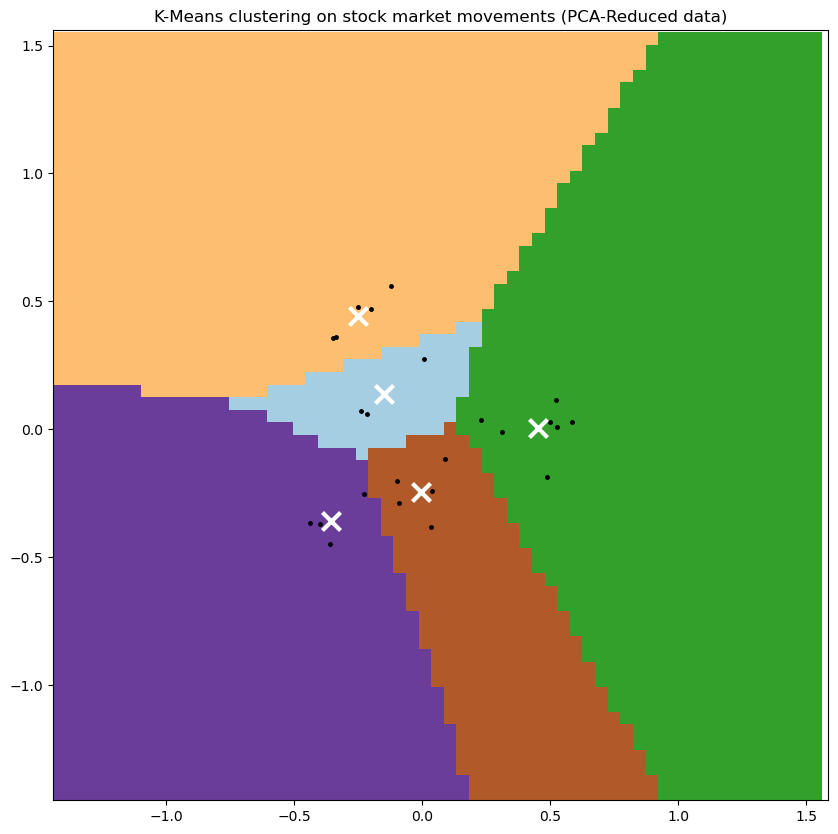

In [243]:
# IMport the packages
from sklearn.decomposition import PCA

# Reduce the data
pca_data = PCA(n_components = 2).fit_transform(norm_movements)

# Define step size of mesh
h = 0.05

# Plot the decision boundary
x_min, x_max = pca_data[:,0].min()-1, pca_data[:,0].max() + 1
y_min, y_max = pca_data[:,1].min()-1, pca_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h), np.arange(y_min,y_max,h))

# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define color plot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(pca_data[:,0],pca_data[:,1],'k.',markersize = 5)
# Plot the centroid of each cluster as a white X

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()